# German Traffic Sign Recognition Benchmark
*The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011.*


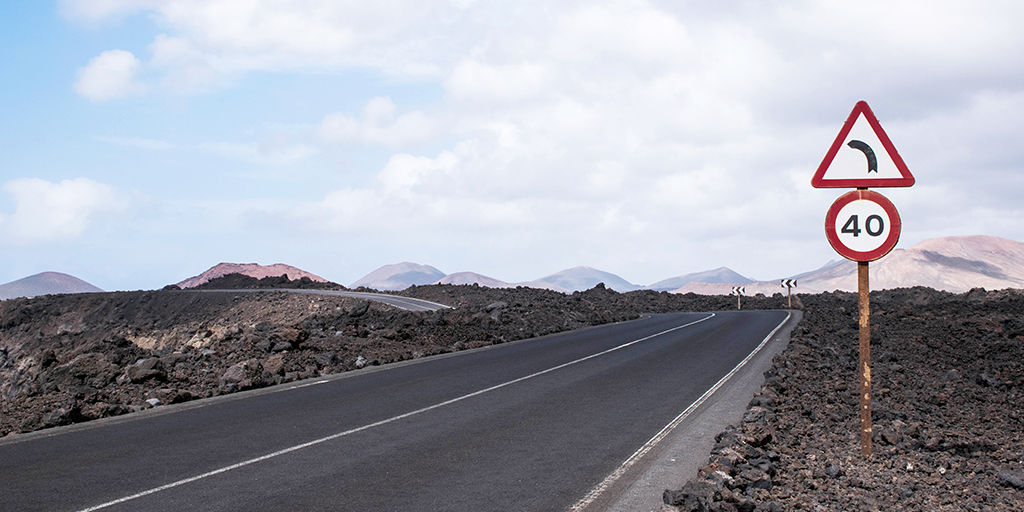

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import random
from matplotlib.image import imread
from PIL import Image
from sklearn.model_selection import train_test_split

### Importing Dataset

In [2]:
#getting current path
curr_path = os.getcwd()
curr_path

'D:\\Deep Learning\\GTSRB'

In [3]:
data = []
labels = []
unavailable = 0
classes = 43
class_len = []
class_label = []
for i in range(classes):
    path = os.path.join(curr_path,'Final_Training\\Images',str(i))
    images = os.listdir(path)
    class_label.append(i)
    class_len.append(len(images))
    
    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            unavailable += 1
data = np.array(data)
labels = np.array(labels)

print('Data Shape: {} || Labels: {} || Unavailable: {}'.format(data.shape, labels.shape, unavailable))

Data Shape: (39209, 32, 32, 3) || Labels: (39209,) || Unavailable: 43


In [4]:
#copying data
data_copy = data
labels_copy = labels
unavilable_copy = unavailable
class_len_copy = class_len
class_label_copy = class_label

### Data Visualisation

In [5]:
#Interpretaion of the labelled clases.
interpret = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

<AxesSubplot:>

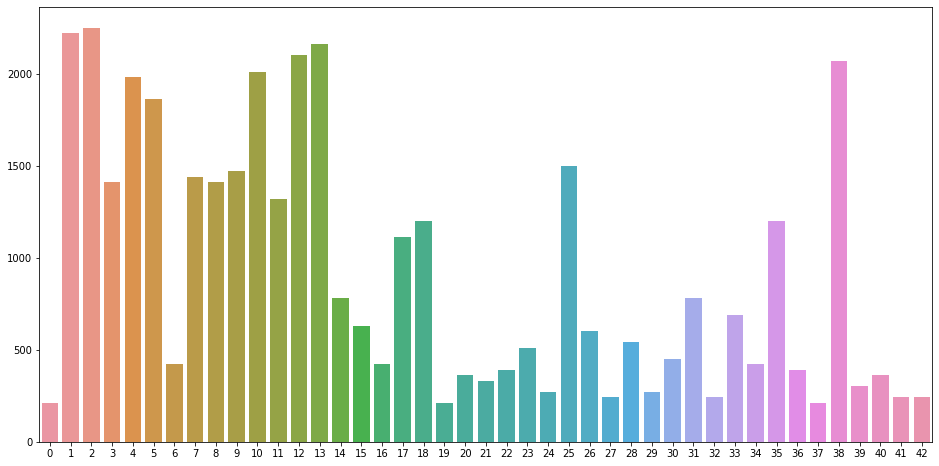

In [6]:
plt.figure(figsize=(16, 8))
sns.barplot(x=class_label, y=class_len)

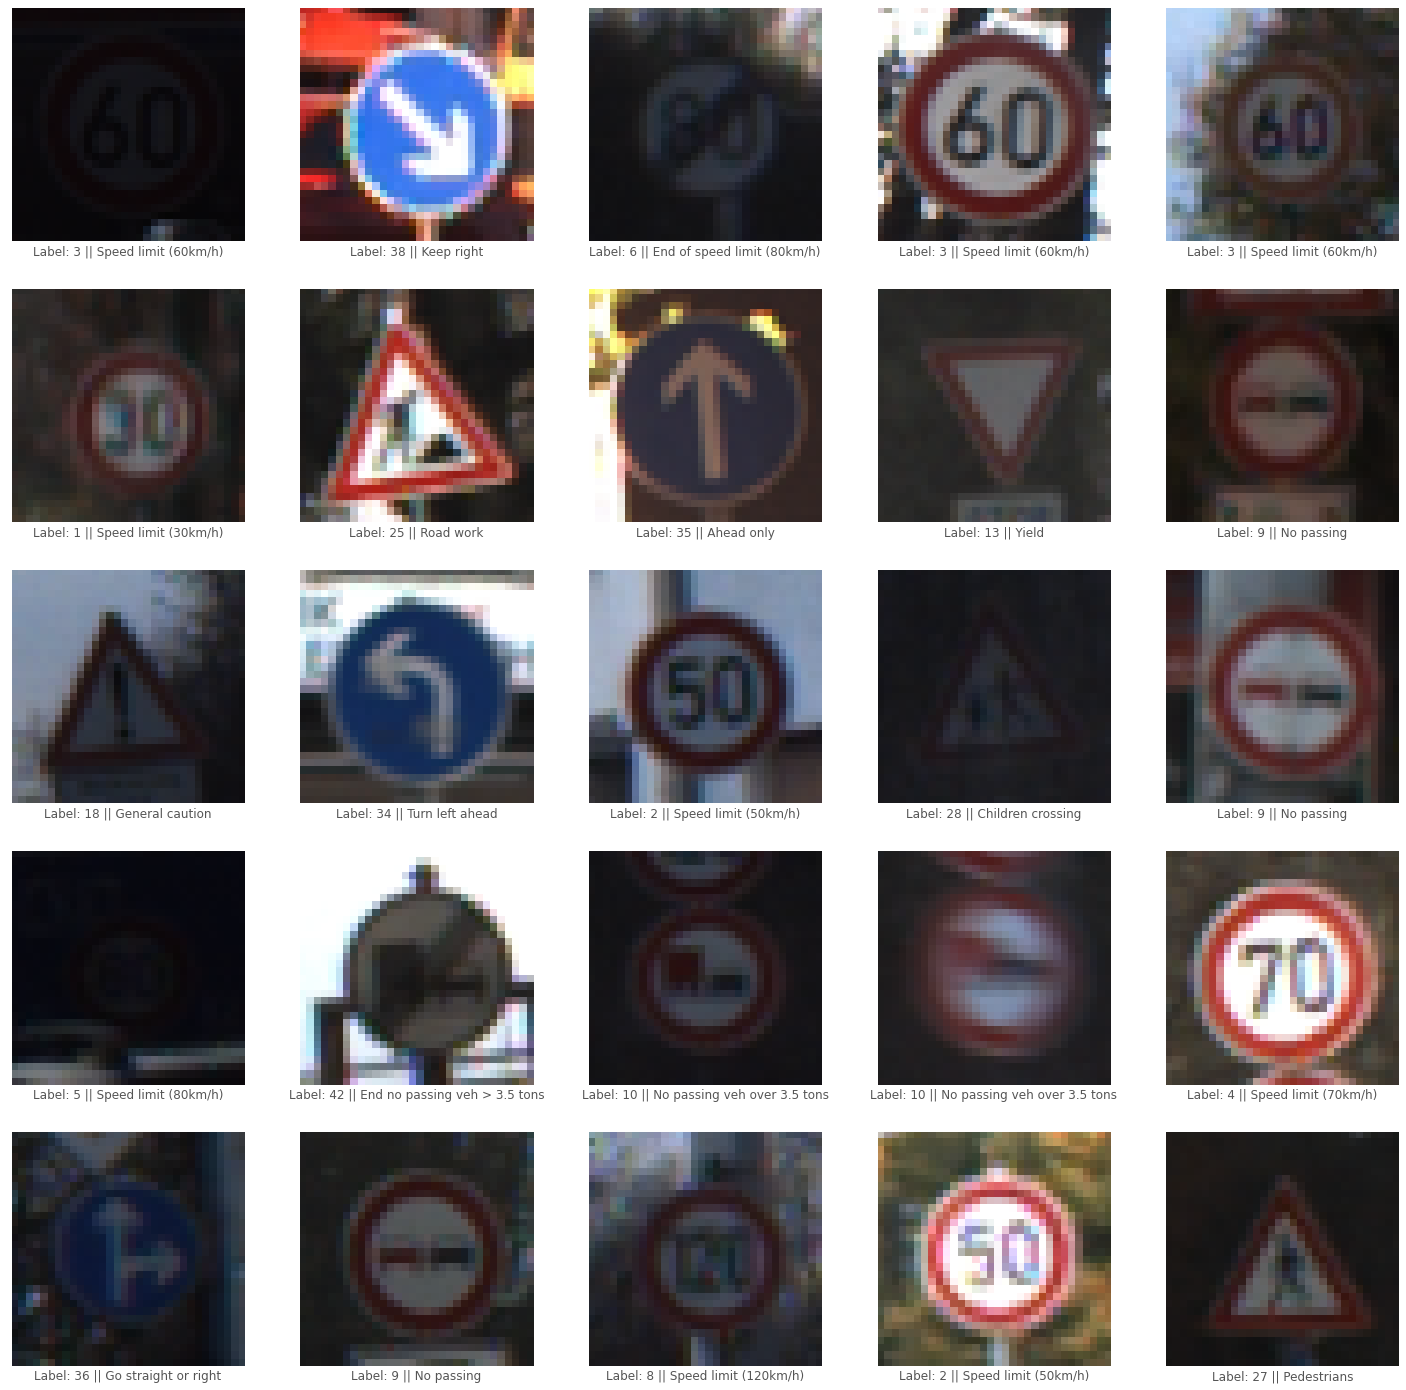

In [7]:
#plotting 25 random images from the training dataset
plt.style.use('ggplot')
plt.figure(figsize=(25, 25))

for i in range(1, 26):
    index = np.random.randint(0, 39209)
    plt.subplot(5, 5, i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Label: {} || {}'.format(labels[index], interpret[labels[index]]))
    plt.imshow(data[index])
plt.show()

### Input Normalisation

In [8]:
data = data/255

### Splitting into Train and Validation Set

In [9]:
#train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, labels, random_state=42, test_size=0.2, shuffle=True)
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


### Label one hot encoding

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)

print('Y Train shape: {}'.format(y_train.shape))
print('Y Validation shape: {}'.format(y_val.shape))

Y Train shape: (31367, 43)
Y Validation shape: (7842, 43)


In [11]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Data Augmentation

In [12]:
aug_data = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
                                                    zoom_range=0.10,
                                                    width_shift_range=0.1,
                                                    height_shift_range=0.1,
                                                    shear_range=0.15,
                                                    horizontal_flip=False,
                                                    vertical_flip=False,
                                                    fill_mode='nearest')

### Convolutional Neural Network

In [13]:
convnet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=3, 
                           activation='relu', 
                           input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=3, 
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=3, 
                           padding='same', 
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=128, 
                           kernel_size=3, 
                           padding='same', 
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, 
                          activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(units=43, 
                          activation='softmax')
])

convnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 128)         5

In [14]:
convnet.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [15]:
history = convnet.fit(aug_data.flow(X_train, y_train, batch_size=32), 
                      epochs=20, 
                      validation_data=(X_val, y_val))

Epoch 1/20
981/981 [==============================] - 85s 84ms/step - loss: 0.8245 - accuracy: 0.7660 - val_loss: 0.2423 - val_accuracy: 0.9278
Epoch 2/20
981/981 [==============================] - 82s 83ms/step - loss: 0.1352 - accuracy: 0.9581 - val_loss: 0.0458 - val_accuracy: 0.9851
Epoch 3/20
981/981 [==============================] - 82s 83ms/step - loss: 0.0865 - accuracy: 0.9727 - val_loss: 0.1834 - val_accuracy: 0.9454
Epoch 4/20
981/981 [==============================] - 82s 84ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.0354 - val_accuracy: 0.9897
Epoch 5/20
981/981 [==============================] - 79s 80ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0247 - val_accuracy: 0.9920
Epoch 6/20
981/981 [==============================] - 79s 80ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0189 - val_accuracy: 0.9945
Epoch 7/20
981/981 [==============================] - 81s 83ms/step - loss: 0.0510 - accuracy: 0.9832 - val_loss: 0.0682 - val_accuracy:

### Plotting Accuracy and Loss

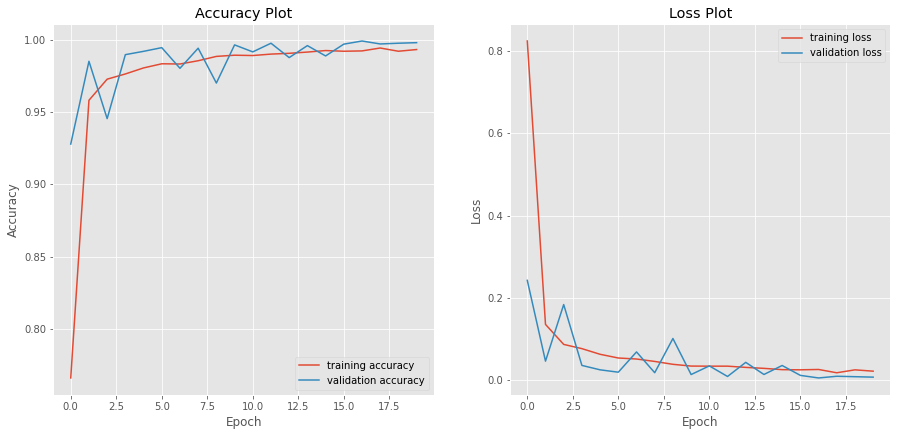

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))
#-------------------------------#
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.grid(True)
#-------------------------------#
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Prediction on Test set

In [17]:
data_test=[]
path = 'D:\Deep Learning\GTSRB\Final_Test\Images'
images = os.listdir(path)
for a in images:
    try:
        image = Image.open(path+'\\'+a)
        image = image.resize((32,32))
        image = np.array(image)
        data_test.append(image)
    except:
        print('Error loading data')
data_test = np.array(data_test)/255

In [18]:
#copying test file names
data_test_copy = data_test

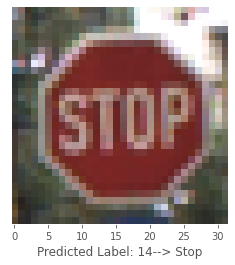

In [19]:
test_index = np.random.randint(X_val.shape[0])
predictions = np.argmax(convnet.predict(data_test[test_index].reshape(-1, 32, 32, 3)))
plt.imshow(data_test[test_index])
plt.grid(False)
plt.yticks([])
plt.xlabel('Predicted Label: {}--> {}'.format(predictions, interpret[predictions]))
plt.show()

In [20]:
print('The label predicted for this image is: {}'.format(interpret[predictions]))

The label predicted for this image is: Stop
